# Check and Evaluate the Recordings

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from pygsp import graphs, filters, plotting, reduction
import os.path

from fgsp.graph.wavelet_evaluator import WaveletEvaluator
from fgsp.graph.global_graph import GlobalGraph
from fgsp.common.config import ClientConfig

%load_ext autoreload
%autoreload 2
%matplotlib inline

plotting.BACKEND = 'matplotlib'
plt.rcParams['figure.figsize'] = (10, 5)

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## General Settings

In [5]:
dataroot = '/home/berlukas/Documents/workspace/ros2/fgsp_ws/src/fgsp/data/'
datasets = ['cerberus_1628234608858365952/data/']

n_datasets = len(datasets)
opt_signals = []
est_signals = []
opt_trajectory = []
est_trajectory = []
est_raw_trajectory = []
opt_graph_coords = []
opt_graph_adj = []
est_graph_coords = []
est_graph_adj = []
features = []
for ds in datasets:
    ds_path = dataroot + ds 
    print(f'Loading data from {ds_path}')
    opt_signal_path = ds_path + 'opt_signal.npy'
    opt_traj_path = ds_path + 'opt_trajectory.npy'
    est_signal_path = ds_path + 'est_signal.npy'
    est_traj_path = ds_path + 'est_trajectory.npy'  
    est_raw_traj_path = ds_path + 'est_raw_trajectory.npy'  
    opt_graph_coords_path = ds_path + 'opt_graph_coords.npy'
    opt_graph_adj_path = ds_path + 'opt_graph_adj.npy'
    est_graph_coords_path = ds_path + 'est_graph_coords.npy'
    est_graph_adj_path = ds_path + 'est_graph_adj.npy'
    features_path = ds_path + 'features.npy'
 
    if os.path.isfile(opt_signal_path) and os.path.isfile(est_signal_path):
        opt_signals.append(np.load(opt_signal_path))
        est_signals.append(np.load(est_signal_path))
    else:
        print(f'Signal files are not available:')
        print(f'Opt file: {opt_signal_path}')
        print(f'Est file: {est_signal_path}')
        
    if os.path.isfile(opt_traj_path) and os.path.isfile(est_traj_path) and os.path.isfile(est_raw_traj_path):
        opt_trajectory.append(np.load(opt_traj_path))
        est_trajectory.append(np.load(est_traj_path))
        est_raw_trajectory.append(np.load(est_raw_traj_path))
    else:
        print(f'Trajectory files are not available.')
        print(f'Opt file: {opt_traj_path}')
        print(f'Est file: {est_traj_path}')
        print(f'Est raw file: {est_raw_traj_path}')
    
    if os.path.isfile(opt_graph_coords_path) and os.path.isfile(opt_graph_adj_path):
        opt_graph_coords.append(np.load(opt_graph_coords_path))
        opt_graph_adj.append(np.load(opt_graph_adj_path))
    else:
        print(f'Opt Graph files are not available.')
        print(f'Coords file: {opt_graph_coords_path}')
        print(f'Adj file: {opt_graph_adj_path}')
        
    if os.path.isfile(est_graph_coords_path) and os.path.isfile(est_graph_adj_path):
        est_graph_coords.append(np.load(est_graph_coords_path))
        est_graph_adj.append(np.load(est_graph_adj_path, allow_pickle=True))
    else:
        print(f'Est Graph files are not available.')
        print(f'Coords file: {est_graph_coords_path}')
        print(f'Adj file: {est_graph_adj_path}')
        
    if os.path.isfile(features_path):
        features.append(np.load(features_path))
    else:
        print(f'Features are not available: {features_path}')
print(f'=======================================')

Loading data from /home/berlukas/Documents/workspace/ros2/fgsp_ws/src/fgsp/data/cerberus_1628234608858365952/data/


## Evaluate Signals

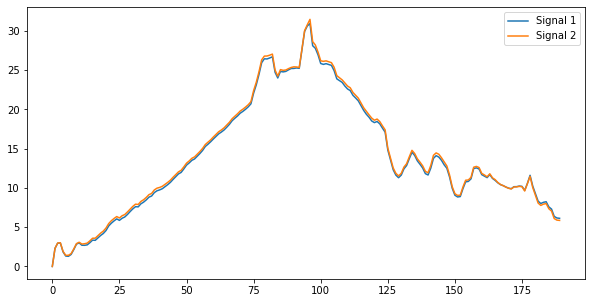

Signal shapes are (190,) and (190,)


In [6]:
def compare_signals(signal_1, signal_2):
    plt.plot(signal_1, label='Signal 1')
    plt.plot(signal_2, label='Signal 2')
    plt.legend()
    plt.show()

i = 0
# compare_signals(est_signals[i][:,0], opt_signals[i][:,0)
compare_signals(est_signals[i], opt_signals[i])
print(f'Signal shapes are {est_signals[i].shape} and {opt_signals[i].shape}')

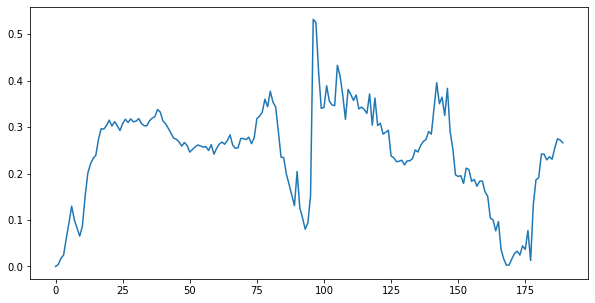

In [7]:
def show_diff_signals(signal_1, signal_2):
    diff_signal = np.abs(signal_1 - signal_2)
    plt.plot(diff_signal, label='Signal')
    plt.show()
    
i = 0
# show_diff_signals(est_signals[i][:,0], opt_signals[i][:,0])
show_diff_signals(est_signals[i], opt_signals[i])

## Evaluate Trajectories

Synced signal shapes are (190, 8) and (190, 8)


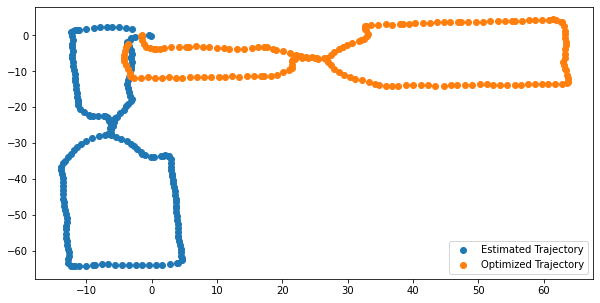

Raw est shape is (3301, 8)


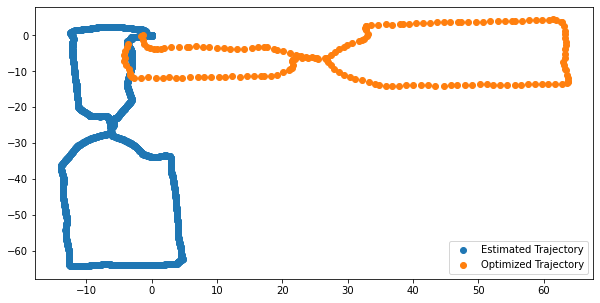

In [8]:
def compare_trajectories(est_traj, opt_traj):    
    plt.scatter(est_traj[:,1], est_traj[:,2], label='Estimated Trajectory')
    plt.scatter(opt_traj[:,1], opt_traj[:,2], label='Optimized Trajectory')
    plt.legend()
    plt.show()
    
i = 0
print(f'Synced signal shapes are {est_trajectory[i].shape} and {opt_trajectory[i].shape}')
compare_trajectories(est_trajectory[i], opt_trajectory[i])
print(f'Raw est shape is {est_raw_trajectory[i].shape}')
compare_trajectories(est_raw_trajectory[i], opt_trajectory[i])

## Evaluate Graph

(<Figure size 720x360 with 1 Axes>,
 <Axes3DSubplot:title={'center':'Graph(n_vertices=190, n_edges=3028)'}>)

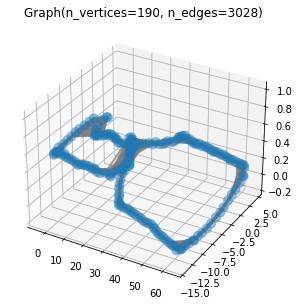

In [9]:
graph_per_dataset = []
for i in range(0, n_datasets):
    G = graphs.Graph(opt_graph_adj[i])
    G.set_coordinates(opt_graph_coords[i][:, 0:3])
    G.compute_fourier_basis()
    graph_per_dataset.append(G)

graph_per_dataset[0].plot()

(<Figure size 720x360 with 1 Axes>,
 <Axes3DSubplot:title={'center':'Graph(n_vertices=190, n_edges=2906)'}>)

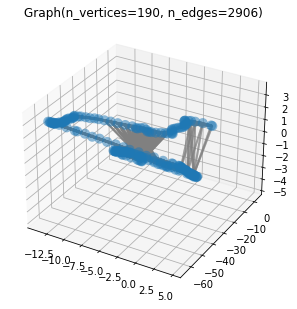

In [10]:
robot_graph_per_dataset = []
for i in range(0, n_datasets):
    G = graphs.Graph(est_graph_adj[i])
    G.set_coordinates(est_graph_coords[i][:, 0:3])
    G.compute_fourier_basis()
    robot_graph_per_dataset.append(G)

robot_graph_per_dataset[0].plot()

2906

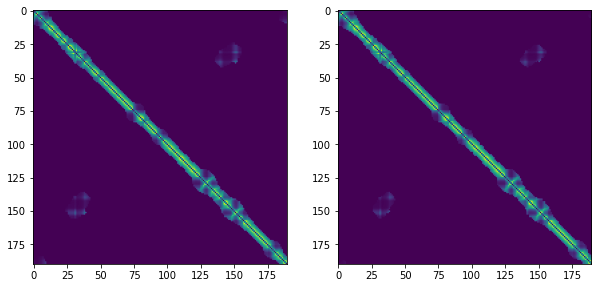

In [11]:
fig, ax = plt.subplots(1, 2)
plt.subplot(1, 2, 1)
global_adj_plot = plt.imshow(graph_per_dataset[0].W.toarray())
plt.subplot(1, 2, 2)
robot_adj_plot = plt.imshow(robot_graph_per_dataset[0].W.toarray())

np.count_nonzero(robot_graph_per_dataset[0].W.toarray())

In [12]:
eval = WaveletEvaluator()
eval.compute_wavelets(graph_per_dataset[0])
psi = eval.get_wavelets()

[1658229778165626.0] WaveletEvaluator: Computing wavelets for 6 scales.


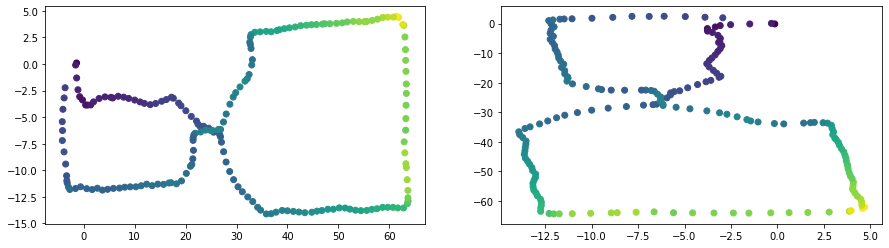

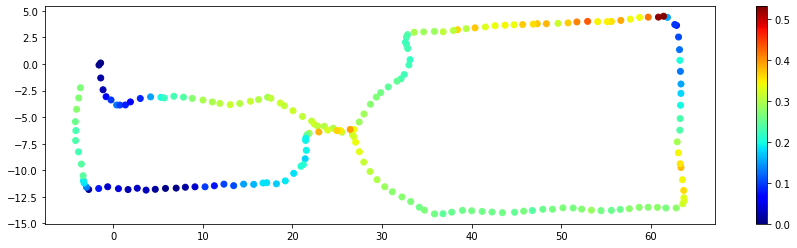

In [13]:
i=0
fig, axes = plt.subplots(1, 2, figsize=(15, 4))
fig.subplots_adjust(hspace=0.5)

axes[0].scatter(opt_graph_coords[i][:,0], opt_graph_coords[i][:,1], c=opt_signals[i], label='Optimized Trajectory')
axes[1].scatter(est_graph_coords[i][:,0], est_graph_coords[i][:,1], c=est_signals[i], label='Estimated Trajectory')
plt.show()

fig, axes = plt.subplots(1, 1, figsize=(15, 4))
diff_signal = np.abs(opt_signals[i] - est_signals[i])
sc = axes.scatter(opt_graph_coords[i][:,0], opt_graph_coords[i][:,1], c=diff_signal, label='Optimized Trajectory', cmap='jet')
fig.colorbar(sc, ax=axes)
plt.show()

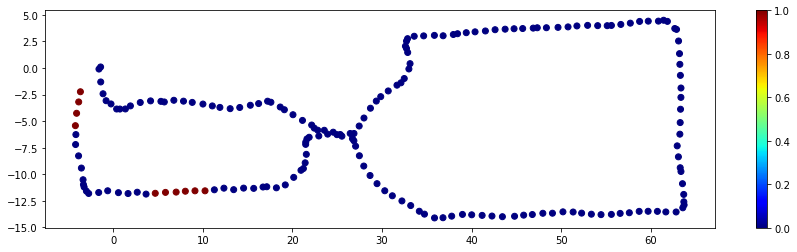

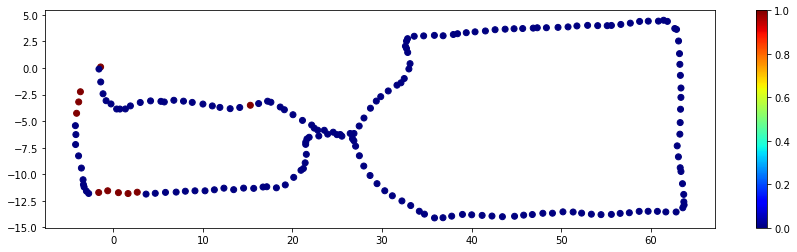

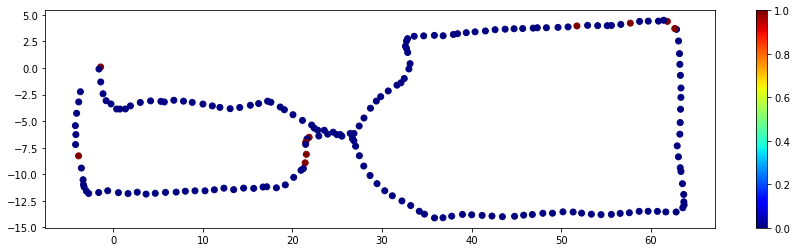

In [17]:
def get_top_n_indices(signal, n):
  return sorted(range(len(signal)), key=lambda i: signal[i], reverse=True)[:n]

def get_top_signal(top_n, n_signal):
  signal = np.zeros((n_signal, 1))
  for i in top_n:
    signal[i] = 1
  return signal

n = 10
i = 0
top_n_low = get_top_n_indices(features[i][:,0], n)
top_n_mid = get_top_n_indices(features[i][:,1], n)
top_n_high = get_top_n_indices(features[i][:,2], n)


top_signal_low = get_top_signal(top_n_low, features[i].shape[0])
top_signal_mid = get_top_signal(top_n_mid, features[i].shape[0])
top_signal_high = get_top_signal(top_n_high, features[i].shape[0])

fig, axes = plt.subplots(1, 1, figsize=(15, 4))
sc = axes.scatter(opt_graph_coords[i][:,0], opt_graph_coords[i][:,1], c=top_signal_low, label='Optimized Trajectory', cmap='jet')
fig.colorbar(sc, ax=axes)
plt.show()

fig, axes = plt.subplots(1, 1, figsize=(15, 4))
sc = axes.scatter(opt_graph_coords[i][:,0], opt_graph_coords[i][:,1], c=top_signal_mid, label='Optimized Trajectory', cmap='jet')
fig.colorbar(sc, ax=axes)
plt.show()

fig, axes = plt.subplots(1, 1, figsize=(15, 4))
sc = axes.scatter(opt_graph_coords[i][:,0], opt_graph_coords[i][:,1], c=top_signal_high, label='Optimized Trajectory', cmap='jet')
fig.colorbar(sc, ax=axes)
plt.show()

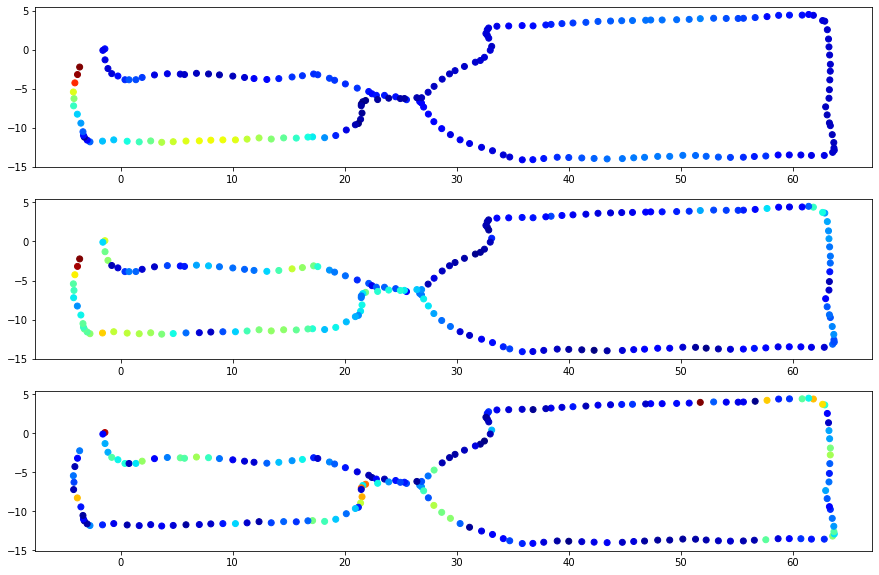

In [22]:
ft_idx = 0 * 3

fig, axes = plt.subplots(3, 1, figsize=(15, 10))
axes[0].scatter(opt_graph_coords[i][:,0], opt_graph_coords[i][:,1], c=features[0][:,ft_idx], label='Optimized Trajectory', cmap='jet')
axes[1].scatter(opt_graph_coords[i][:,0], opt_graph_coords[i][:,1], c=features[0][:,ft_idx+1], label='Optimized Trajectory', cmap='jet')
axes[2].scatter(opt_graph_coords[i][:,0], opt_graph_coords[i][:,1], c=features[0][:,ft_idx+2], label='Optimized Trajectory', cmap='jet')
plt.show()

[1658228096933289.0] GlobalGraph: Initialized.
Build from poses was successful: True


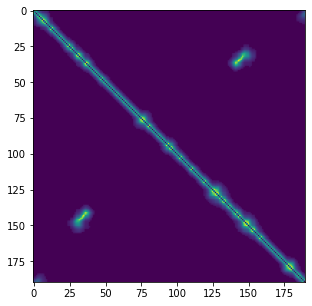

In [23]:
poses = np.column_stack([opt_trajectory[0][:,1:4], opt_trajectory[0][:,4:8], opt_trajectory[0][:,0]])
config = ClientConfig(None)
config.use_se3_computation = False
config.use_so3_computation = False
g = GlobalGraph(config)
succ = g.build_from_poses(poses)
print(f'Build from poses was successful: {succ}')

plt.imshow(g.G.W.toarray())